In [1]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv

F:\Anaconda3\envs\open-mmlab\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
config_file = '../configs/yolact/yolact_r101_1x8_coco.py'
# download the checkpoint from model zoo and put it in `checkpoints/`
# url: https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
checkpoint_file = '../checkpoints/yolact_r101_1x8_coco_20200908-4cbe9101.pth'

In [3]:
# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')

load checkpoint from local path: ../checkpoints/yolact_r101_1x8_coco_20200908-4cbe9101.pth


In [11]:
# test a single image
img = 'test.jpg'
result = inference_detector(model, img)

#print(result)

In [12]:
def filter_results(result):
    """
    Filter only person class from results (first class)
    """
    bbox = [result[0][0]]
    for i in range(79):
        x = np.array([], dtype=np.float32)
        x.shape = (0, 5)
        bbox.append(x)

    objects = [result[1][0]]
    for i in range(79):
        objects.append([])

    return (bbox, objects)

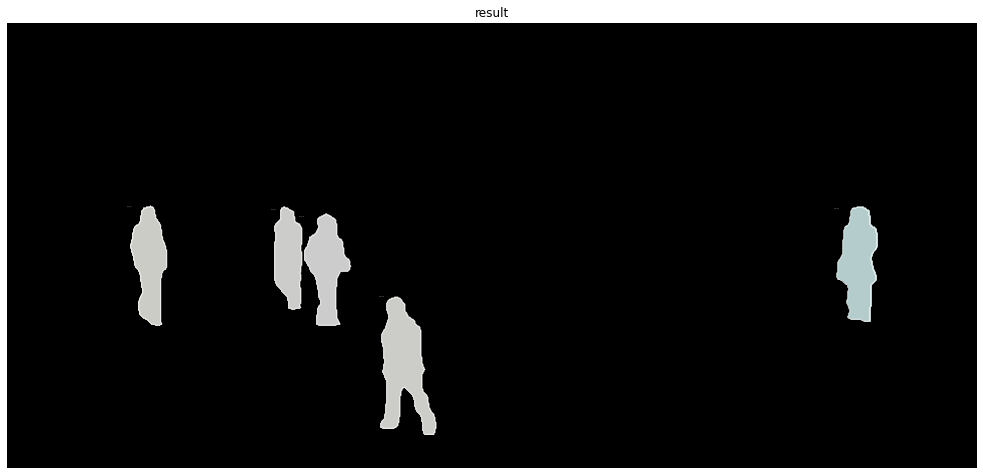

In [13]:
# show the results
import numpy as np
#result = list(result)
result_filtered = filter_results(result)
#for i in range(1,80):
    #result[i] = np.zeros((0, 5), dtype=np.float32)
#result = tuple(result)
#print(result)
show_result_pyplot(model, img, result_filtered,palette='white')

In [4]:
import torch

path = torch.load('../checkpoints/111.pth')
#path['meta']['CLASSES'] = ('person')

#torch.save(path, '../checkpoints/111.pth')

#for i in path.keys():
    #print(i)
    
#print(path['meta'])

#for i in path['meta'].keys():
    #print(i)

new = path['meta']['config']
print(new)
#for i in new.keys():
   # print(i)


RuntimeError: PytorchStreamReader failed reading zip archive: failed finding central directory